In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np 
import pandas as pd
opts = {"with_labels": True, "node_color":'g'}

In [66]:
#Matriz de acoplamiento
def matriz_acoplaminento_acoplamiento_estrella(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 


#Esta funcion crea una Red Topologia regular con acopalmiento circular conectando cada nodo a sus k/2 vecinos mas cercanos
def create_network(n, k):
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    return G



In [67]:
#Parametros del configuracion de la red.
n, k, p= 16, 2, 0.2

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2. 

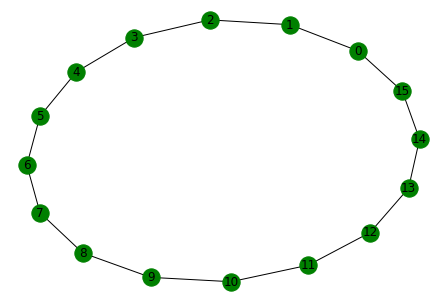

In [68]:
#Red Topologia regular con acopalmiento circular
G_circular = create_network(n,k//2)
nx.draw(G_circular,**opts)
MA = matriz_acoplaminento_acoplamiento_estrella(G_circular)
print(MA)

#Calculo de los valores propios de la matriz de acoplamiento
vpropio = np.linalg.eigvals(MA)
vpropio = sorted(vpropio,reverse=True)
print("Los valores propios son:")
print(vpropio)
print("El valos propio Lamda2 es:")
print(vpropio[1])

La matriz de acoplamiento es:
[[-3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0. -3.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1. -5.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1. -7.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  1. -4.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -3.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1. -4.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -3.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0. -3.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  1.  0. -3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -4.  1.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -3.  1.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1. -6.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0

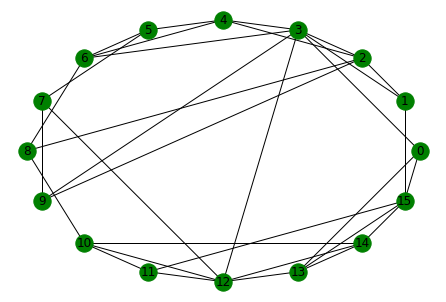

In [69]:
#Modifica la red a partir del algoritmo de Watts - Strogatz
G = nx.watts_strogatz_graph(n, 2*k, p)
nx.draw_circular(G,**opts)
ma = matriz_acoplaminento_acoplamiento_estrella(G)
print("La matriz de acoplamiento es:")
print(ma)
print("El coeficiente de agrupamiento promedio es:",nx.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))

#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valos propio Lamda2 es:")
print(vp[1])